<a target="_blank" href="https://colab.research.google.com/github/IngCarlaPezzone/Call_center_analysis/blob/main/Call_center_eda.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tabla de contenido

- [1. Introducción](#1)
- [2. Carga de datos y exploración inicial](#2)
- [3. Análisis exploratorio univariado](#3)
    - [3.1 Variables cuantitativas](#3.1)
        - [3.1.1 date](#3.1.1)
        - [3.1.2 vru_entry y vru_exit](#3.1.2)
        - [3.1.3 vru_time](#3.1.3)
        - [3.1.4 q_start y q_exit](#3.1.4)
        - [3.1.5 q_time](#3.1.5)
        - [3.1.6 ser_start y ser_exit](#3.1.6)
        - [3.1.7 ser_time](#3.1.7)
    - [3.2 Variables cualitativas](#3.2)
        - [3.2.1 vru.line](#3.2.1)
        - [3.2.2 call_id](#3.2.2)
        - [3.2.3 customer_id](#3.2.3)
        - [3.2.4 priority](#3.2.4)
        - [3.2.5 type](#3.2.5)
        - [3.2.6 outcome](#3.2.6)
        - [3.2.7 server](#3.2.7)
- [4. Descarga del DataFrame limpio](#4)

<a name='1'></a>
# 1. Introducción

En esta Notebook se realizará la carga de los datos del Call Center para posteriormente limpiarlo y realizar un análisis exploratorio de cada una variables con el objetivo de obtener un conjunto de datos limpio para analizar las preguntas de negocio realizadas para este proyecto. En el documento [Data_dictionary](Data_dictionary.md) se describen los detalles de cada variable y del negocio.

<a name='2'></a>
# 2. Carga de datos y exploración inicial

In [76]:
# Se cargan los datos y se observan
df = pd.read_csv('Call_Center_1999_DataSet.csv', sep=';')
df

C:\Users\Marco\AppData\Local\Temp\ipykernel_4572\3742893584.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Call_Center_1999_DataSet.csv', sep=';')


,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,AA0216,17211,0.0,0,IN,1999-12-31,13:46:51,13:47:04,13,0:00:00,0:00:00,0,AGENT,13:47:03,13:56:16,553,Z2ELINOR,334
444444,AA0216,17212,0.0,0,IN,1999-12-31,13:58:31,13:58:40,9,13:58:40,13:59:49,69,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444445,AA0216,17213,0.0,0,IN,1999-12-31,17:10:51,17:11:12,21,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444446,AA0216,17214,0.0,0,IN,1999-12-31,18:30:19,18:30:54,35,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334


In [77]:
# Variables del data set
df.columns

Index(['vru.line', 'call_id', 'customer_id', 'priority', 'type', 'date',
       'vru_entry', 'vru_exit', 'vru_time', 'q_start', 'q_exit', 'q_time',
       'outcome', 'ser_start', 'ser_exit', 'ser_time', 'server', 'startdate'],
      dtype='object')

In [78]:
# Cantidad de registros y columnas
df.shape

(444448, 18)

In [79]:
# Tipo de dato y nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   vru.line     444448 non-null  object
 1   call_id      444448 non-null  int64 
 2   customer_id  444448 non-null  object
 3   priority     444448 non-null  int64 
 4   type         444448 non-null  object
 5   date         444448 non-null  object
 6   vru_entry    444448 non-null  object
 7   vru_exit     444448 non-null  object
 8   vru_time     444448 non-null  int64 
 9   q_start      444448 non-null  object
 10  q_exit       444448 non-null  object
 11  q_time       444448 non-null  int64 
 12  outcome      444448 non-null  object
 13  ser_start    444448 non-null  object
 14  ser_exit     444448 non-null  object
 15  ser_time     444448 non-null  int64 
 16  server       444448 non-null  object
 17  startdate    444448 non-null  int64 
dtypes: int64(6), object(12)
memory usage: 61.0+ 

In [80]:
# Transformación de los tipo de datos
df['vru.line']  =df['vru.line'].astype('str')
df['call_id']   =df['call_id'].astype('str')
df['priority']  =df['priority'].astype('category')
df['type']      =df['type'].astype('category')
df['date']      =pd.to_datetime(df['date'])
df['vru_entry'] =pd.to_datetime(df['vru_entry'])
df['vru_exit']  =pd.to_datetime(df['vru_exit'])
df['q_start']   =pd.to_datetime(df['q_start'])
df['q_exit']    =pd.to_datetime(df['q_exit'])
df['outcome']   =df['outcome'].astype('category')
df['ser_start'] =pd.to_datetime(df['ser_start'])
df['ser_exit']  =pd.to_datetime(df['ser_exit'])
df['vru_entry'] =pd.to_datetime(df['vru_entry'])
df['server']    =df['server'].astype('category')

In [81]:
# Confirmación del cambio del tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   vru.line     444448 non-null  object        
 1   call_id      444448 non-null  object        
 2   customer_id  444448 non-null  object        
 3   priority     444448 non-null  category      
 4   type         444448 non-null  category      
 5   date         444448 non-null  datetime64[ns]
 6   vru_entry    444448 non-null  datetime64[ns]
 7   vru_exit     444448 non-null  datetime64[ns]
 8   vru_time     444448 non-null  int64         
 9   q_start      444448 non-null  datetime64[ns]
 10  q_exit       444448 non-null  datetime64[ns]
 11  q_time       444448 non-null  int64         
 12  outcome      444448 non-null  category      
 13  ser_start    444448 non-null  datetime64[ns]
 14  ser_exit     444448 non-null  datetime64[ns]
 15  ser_time     444448 non-null  int6

In [82]:
# Resumen estadístico del estado actual de las variables numéricas
df.describe(datetime_is_numeric=True)

,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,ser_start,ser_exit,ser_time,startdate
count,444448,444448,444448,444448.000000,444448,444448,444448.000000,444448,444448,444448.000000,444448.000000
mean,1999-07-06 09:55:09.633522944,2023-08-12 14:27:15.241546496,2023-08-12 14:27:25.527627776,10.286081,2023-08-12 08:29:01.435895808,2023-08-12 08:29:48.776292864,59.004304,2023-08-12 11:43:11.602028544,2023-08-12 11:44:47.382784512,152.561776,172.333974
min,1999-01-01 00:00:00,2023-08-12 00:00:01,2023-08-12 00:00:08,-362.000000,2023-08-12 00:00:00,2023-08-12 00:00:00,0.000000,2023-08-12 00:00:00,2023-08-12 00:00:00,0.000000,0.000000
25%,1999-04-11 00:00:00,2023-08-12 10:45:42,2023-08-12 10:45:51,6.000000,2023-08-12 00:00:00,2023-08-12 00:00:00,0.000000,2023-08-12 08:37:01,2023-08-12 08:38:59,12.000000,90.000000
50%,1999-07-06 00:00:00,2023-08-12 14:03:55,2023-08-12 14:04:06,8.000000,2023-08-12 10:01:48,2023-08-12 10:03:29,16.000000,2023-08-12 12:23:49,2023-08-12 12:26:31,84.000000,181.000000
75%,1999-10-07 00:00:00,2023-08-12 17:43:51,2023-08-12 17:44:01,10.000000,2023-08-12 14:57:19.249999872,2023-08-12 14:59:05,79.000000,2023-08-12 16:50:35,2023-08-12 16:52:39.249999872,185.000000,273.000000
max,1999-12-31 00:00:00,2023-08-12 23:59:58,2023-08-12 23:59:59,4832.000000,2023-08-12 23:59:59,2023-08-12 23:59:59,28693.000000,2023-08-12 23:59:58,2023-08-12 23:59:59,61437.000000,334.000000
std,NaN,NaN,NaN,34.942136,NaN,NaN,119.470328,NaN,NaN,282.372761,104.559247


In [83]:
# Resumen estadístico del estado actual de las variables categóricas
df.describe(include=['category', 'object'])

,vru.line,call_id,customer_id,priority,type,outcome,server
count,444448,444448,444448.0,444448,444448,444448,444448
unique,30,54471,19048.0,3,8,3,53
top,AA0209,37585,0.0,0,PS,AGENT,NO_SERVER
freq,21423,16,178572.0,235168,302522,353143,96511


En esta primera exploración se puede concluir lo siguiente:

* Hay 444.448 registros
* 12 variables
* No hay valores nulos
* La mayoría de los datos se cargaron como objeto pero se realizó la conversión correspondiente.
* Las llamadas registradas se encuentran a lo largo del año 1999.
* Las variables **vru_time**, **q_time** y **ser_time** deben revisarse porque sus valores máximos son muy altos.
* La variable **vru_time** tiene un valor mínimo negativo que se deberá revisar.
* Se contabilizan 30 líneas, siendo la **vru_line** AA0209 la que mas llamadas registra.
* La variable **call_id** deberá revisarse porque presenta valores repetidos para ser id. Esto se debe a que el id es por cada vru, por lo que se sugiere incorporar una variable compuesta por el vru y el id para generar un **id_unico**.
* Se registró el llamado de 19048 clientes, de los cuales el cliente 0 tuvo la mayor frecuencia. Este cliente 0 significa que el cliente no fue identificado como por ejemplo en el caso de los prospectos.
* Hay 3 ategorías de prioridad (**priority**), siendo a priodidad con mayor frecuencia de atención la 0 que corresponde a clientes no identificados o clientes regulares.
* Hay 8 tipos de servicios (**type**), siendo PS el servicio mas solicitado, que corresponde a una actividad regular.
* Hay 3 posibles salidas de la llamada (**outcome**), siendo AGENT la mas frecuente, que significa que se dio servicio al cliente.
* Hay 53 nombres de clientes (**server**) registrados en las llamadas, aunque uno de ellos pertenece a NO_SERVER que significa que no el servicio no fue provisto. Este es el nombre con mayor frecuencia registrada.
* Hay una variable, **startdate**, de la cual no se dispone información, por lo que se borrará.

In [84]:
# Creación de id único por llamada
df['id_unique'] = df['vru.line'] + ' ' + df['call_id']

In [85]:
# Eliminación de startdate
df = df.drop('startdate', axis=1)


A continuación, se explorarán cada variable para detectar anomalías, errores u outliers.

<a name='3'></a>
# 3. Análisis exploratorio univariado

<a name='3.1'></a>
## 3.1 Variables cuantitativas

<a name='3.1.1'></a>
### 3.1.1 date

In [86]:
# Se agrega una nueva columna para el mes
df['month'] = df['date'].dt.month
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [87]:
#Se verifica un solo año
df['date'].dt.year.unique()

array([1999], dtype=int64)

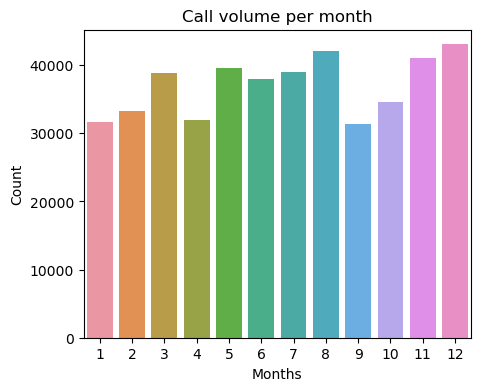

In [88]:
# Se grafica el volumne de llamadas por mes
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='month')

plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Call volume per month')
plt.show()

Los meses de enero, abril y septiembre se registraron bajas en la cantidad de llamadas, siendo diciembre el pico de llamadas.

<a name='3.1.2'></a>
### 3.1.2 vru_entry y vru_exit

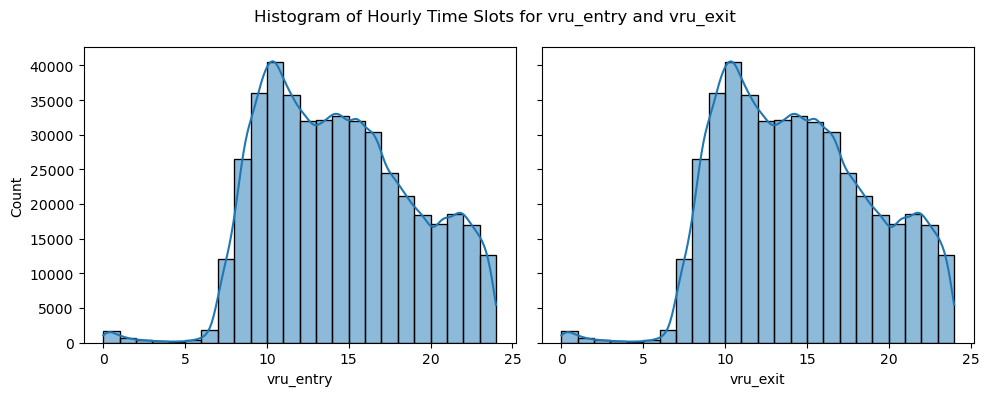

In [89]:
# Se observan la frecuencia de llamadas por horas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
sns.histplot(data=df, x=(df['vru_entry'] - df['vru_entry'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax1)
sns.histplot(data=df, x=(df['vru_exit'] - df['vru_exit'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax2)

ax1.set_xlabel('vru_entry') ; ax1.set_ylabel('Count')
ax2.set_xlabel('vru_exit')
plt.suptitle('Histogram of Hourly Time Slots for vru_entry and vru_exit')
plt.tight_layout()
plt.show()

De 10 a 11 horas se observa el pico de llamados. Se observan pocos llamados cuando se encuentra el VRU automático. Se observa también un segundo pico sostenido alrededor de las 14 hs.

<a name='3.1.3'></a>
### 3.1.3 vru_time

In [90]:
df['vru_time'].describe()

count    444448.000000
mean         10.286081
std          34.942136
min        -362.000000
25%           6.000000
50%           8.000000
75%          10.000000
max        4832.000000
Name: vru_time, dtype: float64

In [91]:
# Se cuentan los valores negativos
neg_count = (df['vru_time'] < 0).sum()
perc_neg = round(neg_count/df['vru_time'].count()*100, 2)
print('Cantidad de valores negativos: ', neg_count)
print('Porcentaje sobre el total:', perc_neg, '%')

Cantidad de valores negativos:  350
Porcentaje sobre el total: 0.08 %


Se observan en la variable vru_time que existen 350 valores negativos en cantidad de segundos en la cola de espera. Revisando los datos parecerían estar invertidos los datos de vru_entry y vru_exit.

Se crean nuevas columnas donde se corrigen estas horas y se recalculan los tiempos de espera.

In [92]:
df['vru_entry_corr'] = np.where(df['vru_entry'] > df['vru_exit'], df['vru_exit'], df['vru_entry'])
df['vru_exit_corr'] = np.where(df['vru_entry'] > df['vru_exit'], df['vru_entry'], df['vru_exit'])

In [93]:
df['vru_time_corr'] = (df['vru_exit_corr'] - df['vru_entry_corr']).dt.total_seconds()
df['vru_time_corr'] = df['vru_time_corr'].astype('int64')

In [94]:
# Se verifican los cambios
df['vru_time_corr'].describe()

count    444448.000000
mean         10.396357
std          34.909485
min           0.000000
25%           6.000000
50%           8.000000
75%          10.000000
max        4832.000000
Name: vru_time_corr, dtype: float64

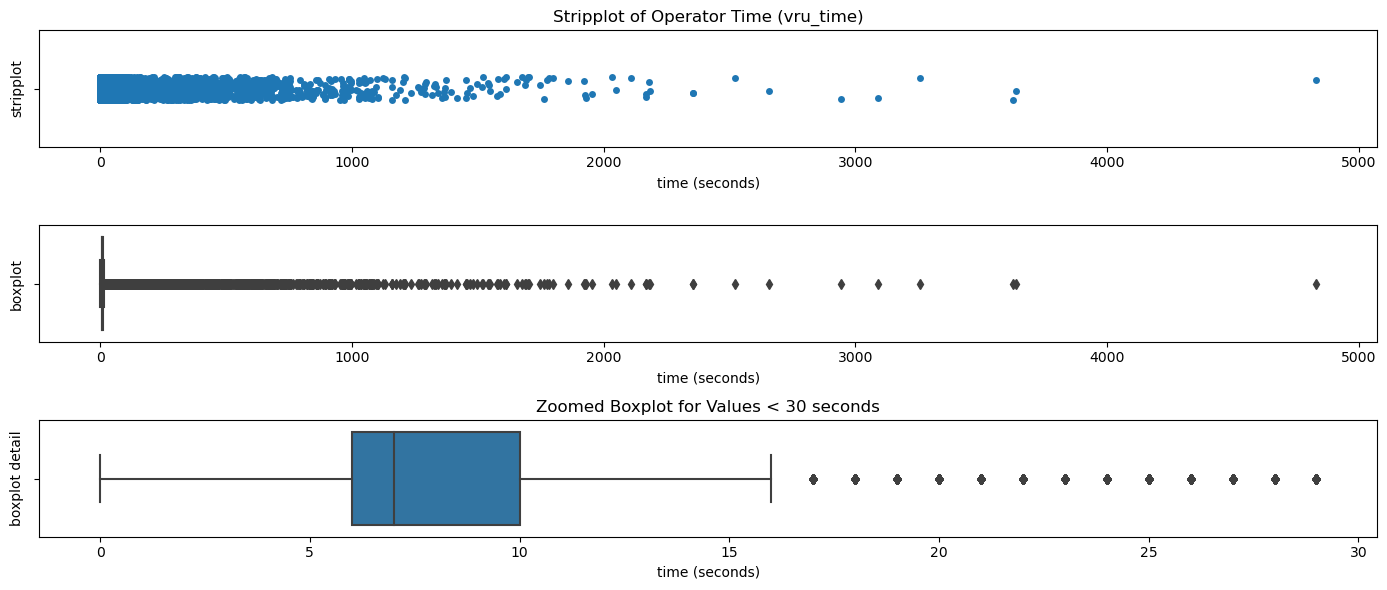

In [95]:
# Se grafican la dispersion de las llamadas y un boxplot a la misma escala que el stripplot y detalle
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(311)
sns.stripplot(data=df, x='vru_time_corr', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of Operator Time (vru_time)')

ax2 = fig.add_subplot(312, sharex=ax1)
sns.boxplot(data=df, x='vru_time_corr', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

ax3 = fig.add_subplot(313)
sns.boxplot(data=df[df['vru_time_corr'] < 30], x='vru_time_corr', ax=ax3)
ax3.set_xlabel('time (seconds)') ; ax3.set_ylabel('boxplot detail') ; ax3.set_title('Zoomed Boxplot for Values < 30 seconds')

plt.tight_layout()

In [96]:
outlier_count = (df['vru_time_corr'] > 16).sum()
perc_outlier = round(outlier_count/df['vru_time_corr'].count()*100,2)
print('Cantidad de valores outlier sobre 16 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 16 segundos:  26654
Porcentaje sobre el total: 6.0 %


In [97]:
outlier_count = (df['vru_time_corr'] > 1000).sum()
perc_outlier = round(outlier_count/df['vru_time_corr'].count()*100,2)
print('Cantidad de valores outlier sobre 1000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 1000 segundos:  110
Porcentaje sobre el total: 0.02 %


Se concluye que la variable vru_time (y en particular la variable corregida vru_time_corr) muestra que el 75% de las llamadas tienen una duración de 10 segundos pero se llega a un máximo de 4832 segundos (unos 80 minutos). El detalle del boxplot muestra que por arriba de los 16 segundos aproximadamente, hay 26333 llamados, que representan cerca del 6% de todos los registros, que podrían ser considerados como atípicos. No obstantes, tiempos de espera hasta 16 minutos (1000 segundos aproximadamente), podrían asumirse como aceptables. En tal caso, quedarían solo 110 llamadas como outliers representando el 0.02% de los llamados. Se decide eliminar estos registros.

In [98]:
df = df[df['vru_time_corr'] <=1000]
(df['vru_time_corr'] > 1000).sum()

0

<a name='3.1.4'></a>
### 3.1.4 q_start y q_exit

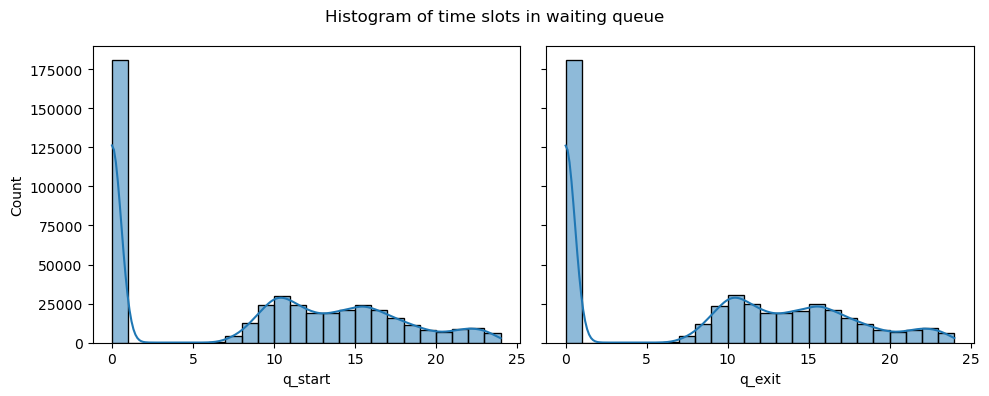

In [99]:
# Se observan la frecuencia de llamadas por horas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
sns.histplot(data=df, x=(df['q_start'] - df['q_start'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax1)
sns.histplot(data=df, x=(df['q_exit'] - df['q_exit'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax2)

ax1.set_xlabel('q_start') ; ax1.set_ylabel('Count')
ax2.set_xlabel('q_exit')
plt.suptitle('Histogram of time slots in waiting queue')
plt.tight_layout()
plt.show()

In [100]:
count_midnight = (df['q_start'].dt.time == pd.to_datetime('00:00:00').time()).sum()
perc_midnight = round(count_midnight/df['q_start'].count()*100, 2)
print('Cantidad de valores 00:00:00: ', count_midnight)
print('Porcentaje sobre el total:', perc_midnight)

Cantidad de valores 00:00:00:  180739
Porcentaje sobre el total: 40.68


En estas variables se puede ver que 180739 clientes llegan a ponerse en la cola y abadonan la llamada estando en el VRU (son registrados en 00:00:00). Esto representa el 41% de las llamadas que ingresan aproximadamente.

<a name='3.1.5'></a>
### 3.1.5 q_time	

In [101]:
# Se agrega una columna con los tiempos reales de espera
def modify_q_time(row):
    if row['priority'] == 2:
        modified_value = row['q_time'] - 90
        return max(modified_value, 0)
    else:
        return row['q_time']

df['q_time_real'] = df.apply(modify_q_time, axis=1)

In [102]:
df['q_time_real'].describe()

count    444338.000000
mean         42.299657
std         113.656575
min           0.000000
25%           0.000000
50%           0.000000
75%          44.000000
max       28693.000000
Name: q_time_real, dtype: float64

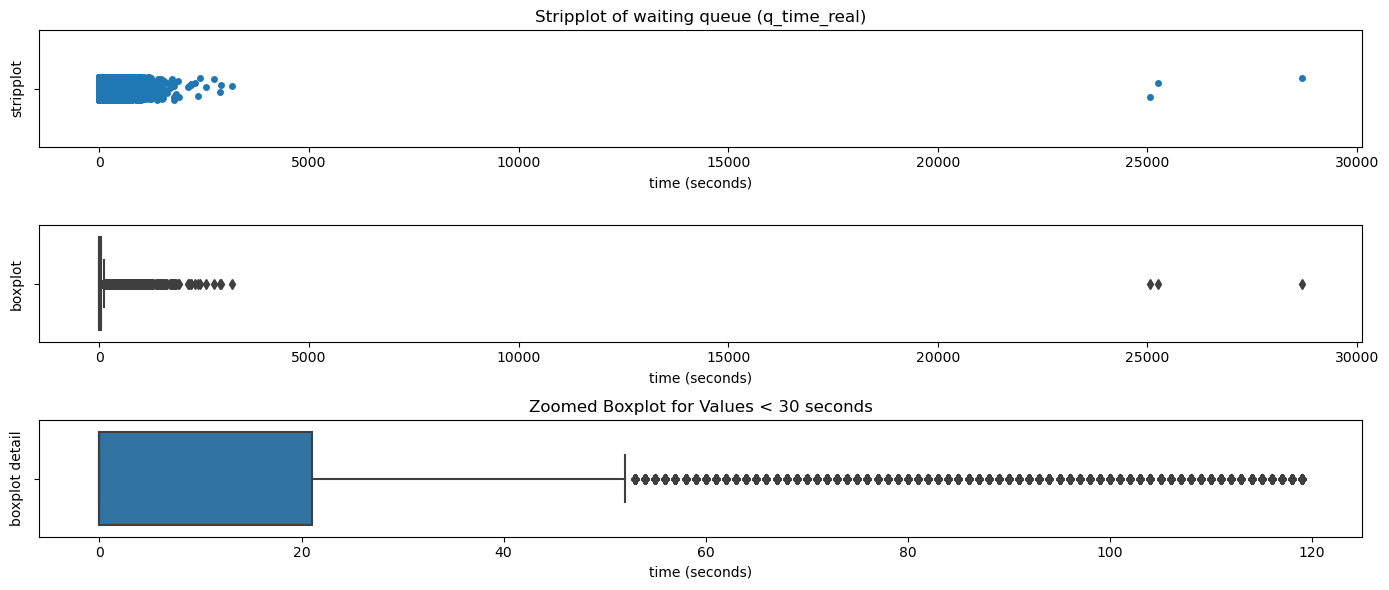

In [103]:
# Se grafican la dispersion de las llamadas y un boxplot a la misma escala que el stripplot y detalle
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(311)
sns.stripplot(data=df, x='q_time_real', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of waiting queue (q_time_real)')

ax2 = fig.add_subplot(312, sharex=ax1)
sns.boxplot(data=df, x='q_time_real', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

ax3 = fig.add_subplot(313)
sns.boxplot(data=df[df['q_time_real'] < 30], x='q_time', ax=ax3)
ax3.set_xlabel('time (seconds)') ; ax3.set_ylabel('boxplot detail') ; ax3.set_title('Zoomed Boxplot for Values < 30 seconds')

plt.tight_layout()

Se observa en los gráficos anteriores que hay 3 valores atípicos mayores a los 20000 segundos que son outliers y deben eliminarse.

In [104]:
df = df[df['q_time'] < 20000]
(df['q_time'] > 20000).sum()

0

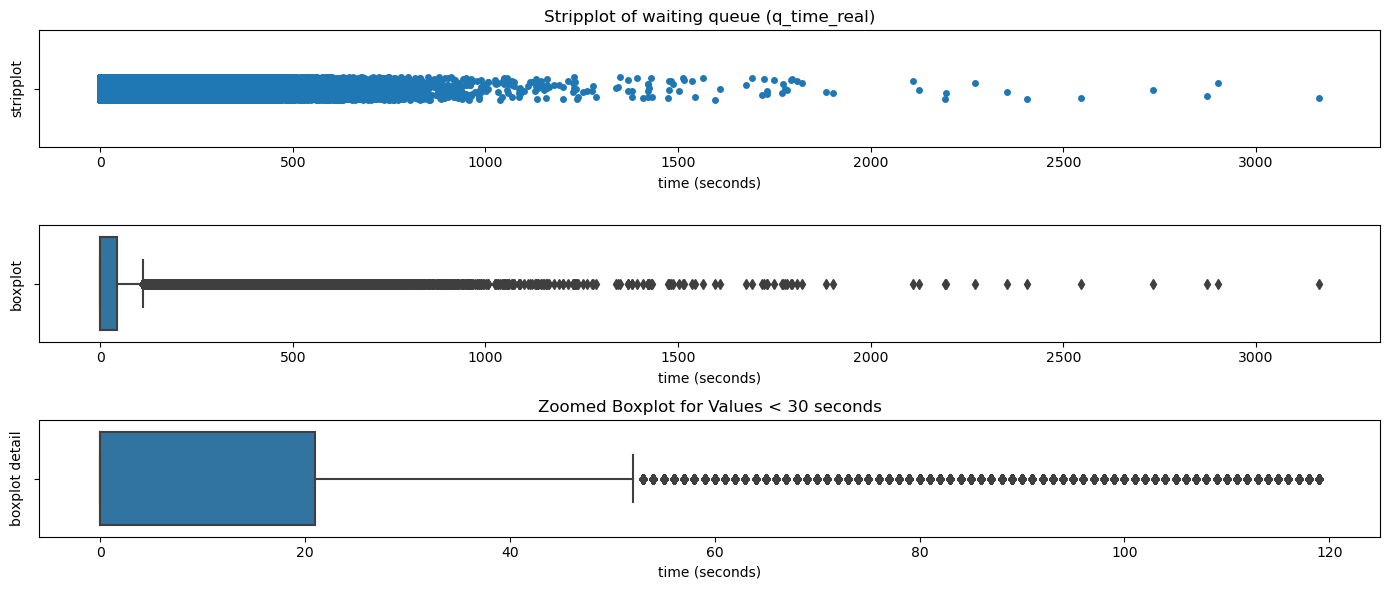

In [105]:
# Se grafican nuevamente
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(311)
sns.stripplot(data=df, x='q_time_real', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of waiting queue (q_time_real)')

ax2 = fig.add_subplot(312, sharex=ax1)
sns.boxplot(data=df, x='q_time_real', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

ax3 = fig.add_subplot(313)
sns.boxplot(data=df[df['q_time_real'] < 30], x='q_time', ax=ax3)
ax3.set_xlabel('time (seconds)') ; ax3.set_ylabel('boxplot detail') ; ax3.set_title('Zoomed Boxplot for Values < 30 seconds')

plt.tight_layout()

In [106]:
outlier_count = (df['q_time'] > 2000).sum()
perc_outlier = round(outlier_count/df['q_time'].count()*100,2)
print('Cantidad de valores outlier sobre 2000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 2000 segundos:  12
Porcentaje sobre el total: 0.0 %


In [107]:
outlier_count = (df['q_time'] > 1000).sum()
perc_outlier = round(outlier_count/df['q_time'].count()*100,2)
print('Cantidad de valores outlier sobre 1000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 1000 segundos:  138
Porcentaje sobre el total: 0.03 %


Ahora se puede observar que hay un grupo de puntos con llamdas de mas de 2000 segundos, que podrían considerarse como outliers. Estos son 12 llamados y representan una cantidad despreciable. En el mismo sentido, y siguiendo con la lógica planteada en vru_time, se asume que una espera de mas de 1000 segundos no es viable. Las llamadas mayores a 1000 segundos son 126 y representan el 0.03%, por lo que se decide borrar.

In [108]:
df = df[df['q_time'] <= 1000]
(df['q_time'] > 1000).sum()

0

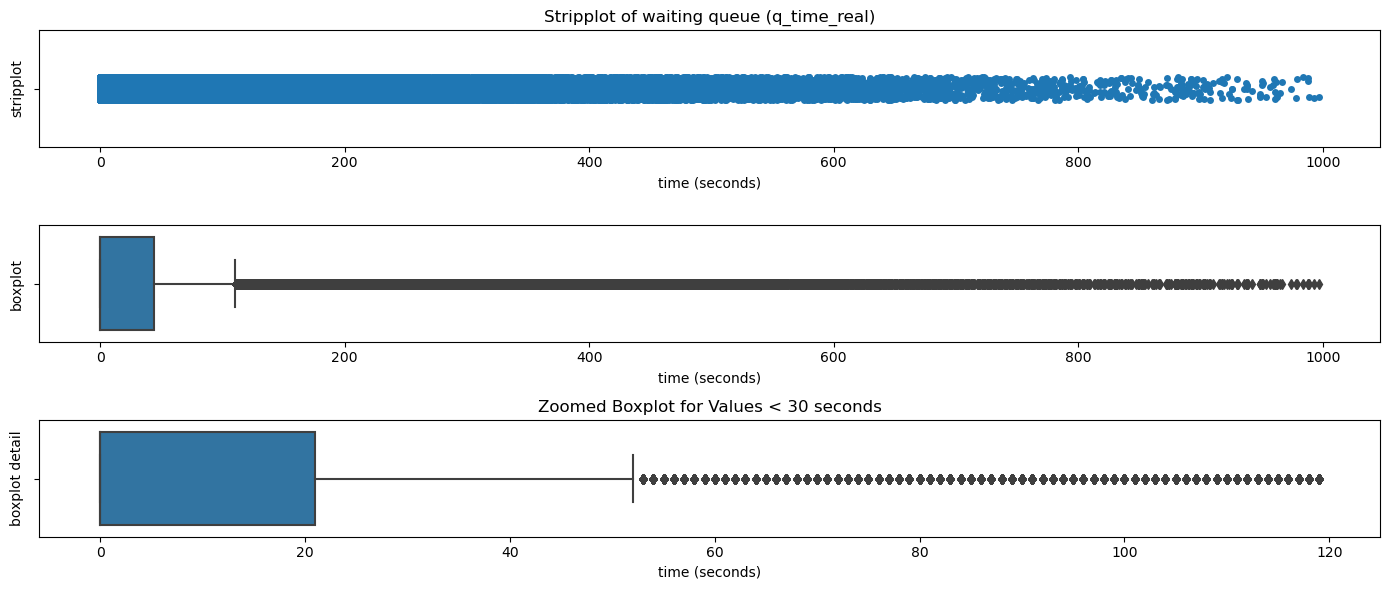

In [109]:
# Se grafican nuevamente
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(311)
sns.stripplot(data=df, x='q_time_real', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of waiting queue (q_time_real)')

ax2 = fig.add_subplot(312, sharex=ax1)
sns.boxplot(data=df, x='q_time_real', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

ax3 = fig.add_subplot(313)
sns.boxplot(data=df[df['q_time_real'] < 30], x='q_time', ax=ax3)
ax3.set_xlabel('time (seconds)') ; ax3.set_ylabel('boxplot detail') ; ax3.set_title('Zoomed Boxplot for Values < 30 seconds')

plt.tight_layout()

In [110]:
df['q_time'].describe()

count    444197.000000
mean         58.426160
std          94.813407
min           0.000000
25%           0.000000
50%          16.000000
75%          78.000000
max         997.000000
Name: q_time, dtype: float64

Considerando a los clientes prioritarios con el tiempo real de espera, se oberva que el 25% de las llamadas son atendidas inmediatamente y que el 75% de las llamadas esperan en la cola menos de 78 segundos.

<a name='3.1.6'></a>
### 3.1.6 ser_start	y ser_exit

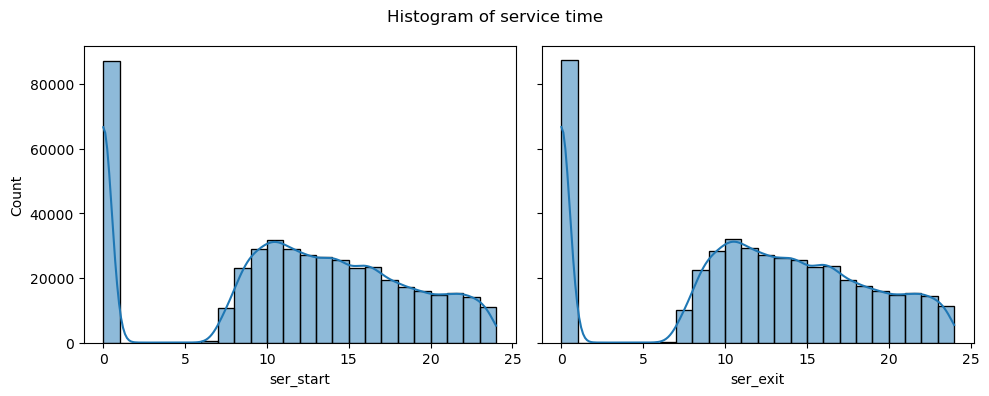

In [111]:
# Se observan la frecuencia de llamadas por horas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
sns.histplot(data=df, x=(df['ser_start'] - df['ser_start'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax1)
sns.histplot(data=df, x=(df['ser_exit'] - df['ser_exit'].dt.normalize()) / pd.Timedelta(hours=1), bins=24, kde=True, ax=ax2)

ax1.set_xlabel('ser_start') ; ax1.set_ylabel('Count')
ax2.set_xlabel('ser_exit')
plt.suptitle('Histogram of service time')
plt.tight_layout()
plt.show()

In [113]:
count_midnight = (df['ser_start'].dt.time == pd.to_datetime('00:00:00').time()).sum()
perc_midnight = round(count_midnight/df['ser_start'].count()*100, 2)
print('Cantidad de valores 00:00:00: ', count_midnight)
print('Porcentaje sobre el total:', perc_midnight)

Cantidad de valores 00:00:00:  86972
Porcentaje sobre el total: 19.58


Se observa que en el caso de clientes que abandonan la llamada es mucho menos cuando ya los atienden que cuando están en la cola de espera, estos son 86972 clientes que representan cerca del 20% de las llamadas.

<a name='3.1.7'></a>
### 3.1.7 ser_time

In [114]:
df['ser_time'].describe()

count    444197.000000
mean        152.387051
std         263.423425
min           0.000000
25%          12.000000
50%          84.000000
75%         185.000000
max       36291.000000
Name: ser_time, dtype: float64

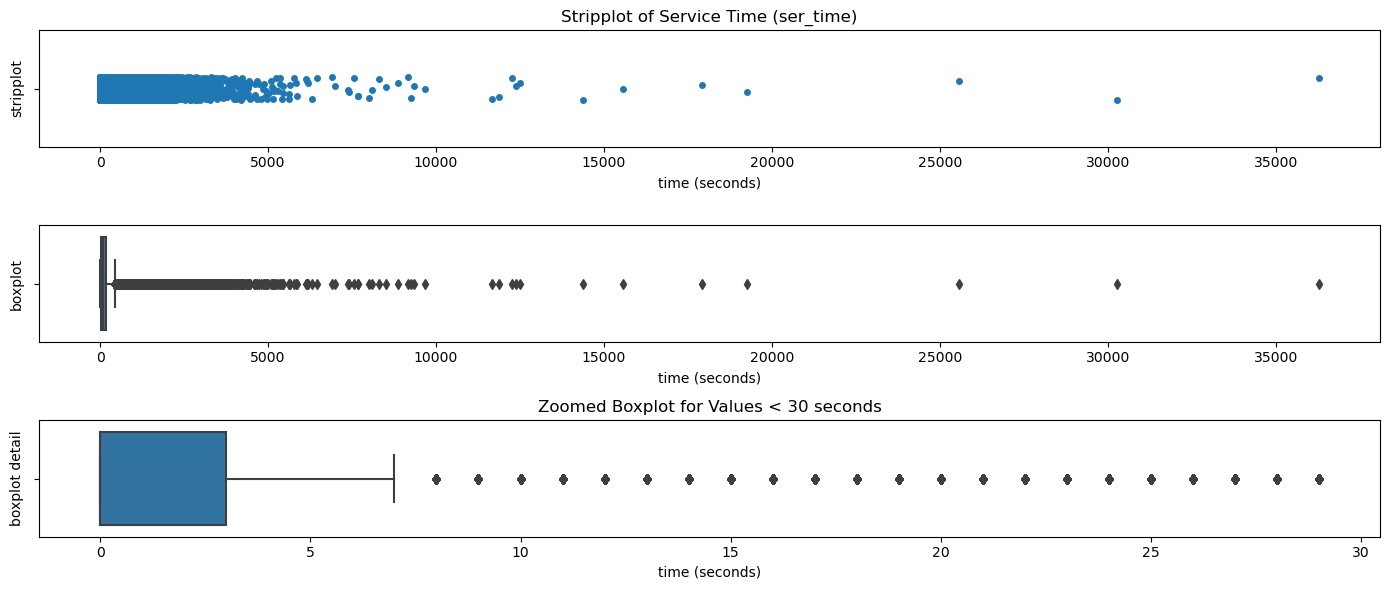

In [115]:
# Se grafican la dispersion de las llamadas y un boxplot a la misma escala que el stripplot y detalle
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(311)
sns.stripplot(data=df, x='ser_time', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of Service Time (ser_time)')

ax2 = fig.add_subplot(312, sharex=ax1)
sns.boxplot(data=df, x='ser_time', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

ax3 = fig.add_subplot(313)
sns.boxplot(data=df[df['ser_time'] < 30], x='ser_time', ax=ax3)
ax3.set_xlabel('time (seconds)') ; ax3.set_ylabel('boxplot detail') ; ax3.set_title('Zoomed Boxplot for Values < 30 seconds')

plt.tight_layout()

In [116]:
zero_count = (df['ser_time'] == 0).sum()
perc_zero = round(zero_count/df['ser_time'].count()*100,2)
print('Cantidad de valores de 0 segundos: ', zero_count)
print('Porcentaje sobre el total:', perc_zero, '%')

Cantidad de valores de 0 segundos:  87682
Porcentaje sobre el total: 19.74 %


In [117]:
outlier_count = (df['ser_time'] > 25000).sum()
perc_outlier = round(outlier_count/df['ser_time'].count()*100,2)
print('Cantidad de valores outlier sobre 25000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 25000 segundos:  3
Porcentaje sobre el total: 0.0 %


In [118]:
outlier_count = (df['ser_time'] > 1000).sum()
perc_outlier = round(outlier_count/df['ser_time'].count()*100,2)
print('Cantidad de valores outlier sobre 1000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 1000 segundos:  5790
Porcentaje sobre el total: 1.3 %


Tal lo visto en ser_start y ser_exit, hay valores de duración 0 que representan cerca del 20% de las llamadas. Por otra parte, tal lo observado anteriormente, se observan 3 valores claramente atípicos, con duración de mas de 25000 segundos. Y siguiendo con el razonamiento anteriormente planteado, se observa que las llamadas de mas de 1000 segundos son poco viables y representan el 1.3% de los datos. Por lo tanto, se decide borrar estos valores.

In [119]:
df = df[df['ser_time'] <= 1000]
(df['ser_time'] > 1000).sum()

0

In [120]:
df['ser_time'].describe()

count    438407.000000
mean        133.686310
std         165.010078
min           0.000000
25%          10.000000
50%          82.000000
75%         178.000000
max        1000.000000
Name: ser_time, dtype: float64

El 75% de los llamados tienen tiempos de servicio menores a 178 segundos con una media de 133 segundos.

<a name='3.2'></a>
## 3.2 Variables cualitativas

<a name='3.2.1'></a>
### 3.2.1 vru.line

In [121]:
df['vru.line'].unique()

array(['AA0101', 'AA0102', 'AA0103', 'AA0104', 'AA0105', 'AA0106',
       'AA0107', 'AA0108', 'AA0109', 'AA0110', 'AA0111', 'AA0112',
       'AA0115', 'AA0116', 'AA0201', 'AA0202', 'AA0203', 'AA0204',
       'AA0205', 'AA0206', 'AA0209', 'AA0210', 'AA0213', 'AA0214',
       'AA0215', 'AA0216', 'AA0113', 'AA0207', 'AA0208', 'AA0114'],
      dtype=object)

In [122]:
df['vru.line'].describe()

count     438407
unique        30
top       AA0209
freq       21206
Name: vru.line, dtype: object

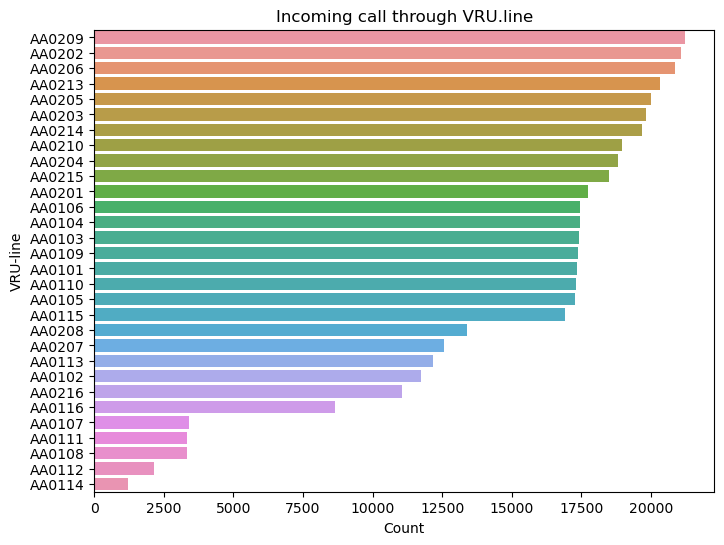

In [123]:
cantidad = df['vru.line'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=cantidad.values, y=cantidad.index, ax=ax)
ax.set_xlabel('Count') ; ax.set_ylabel('VRU-line') ; ax.set_title('Incoming call through VRU.line')
plt.show()

In [124]:
perc_vru_line = (df['vru.line'].value_counts() / len(df)) * 100
perc_vru_line[:5]

AA0209    4.837058
AA0202    4.809230
AA0206    4.757223
AA0213    4.634506
AA0205    4.560374
Name: vru.line, dtype: float64

Se puede ver que la VRU AA02 es donde ingresan la mayor cantidad de llamados, siendo la líneas AA0209 y AA0202 las líneas que mayores ingresos tuvieron (4.8% en ambas). También se puede observar que hay solo dos VRU AA01 y AA02 y las línas van del 0 al 16.

<a name='3.2.2'></a>
### 3.2.2 call_id


In [125]:
df['call_id'].value_counts()

38387    16
34350    16
35672    16
34577    16
34352    16
         ..
54442     1
54441     1
54440     1
54439     1
55656     1
Name: call_id, Length: 54458, dtype: int64

Se confirma que el call_id se repite, que no son unicos en el conjunto, porque son unicos por cada vru.

<a name='3.2.3'></a>
### 3.2.3 customer_id


In [126]:
df['customer_id'].value_counts()

0.0           176132
0              55052
58859752.0      1652
58704610.0      1370
52867744.0      1184
               ...  
310075155          1
3478757            1
29716776           1
24195679           1
53525267.0         1
Name: customer_id, Length: 18996, dtype: int64

Se encontró que hay clientes con 0.0 y '0', por lo que se cambian a 0.0.

In [127]:
df['customer_id'] = df['customer_id'].replace('0', 0.0)

In [128]:
df['customer_id'].value_counts()

0.0           231184
58859752.0      1652
58704610.0      1370
52867744.0      1184
58029430.0      1087
               ...  
62032768.0         1
29974821           1
57366122.0         1
23867294           1
53525267.0         1
Name: customer_id, Length: 18995, dtype: int64

In [129]:
df['customer_id'].nunique()

18995

In [130]:
(df['customer_id'].value_counts() / len(df)) * 100

0.0           52.732735
58859752.0     0.376819
58704610.0     0.312495
52867744.0     0.270069
58029430.0     0.247943
                ...    
62032768.0     0.000228
29974821       0.000228
57366122.0     0.000228
23867294       0.000228
53525267.0     0.000228
Name: customer_id, Length: 18995, dtype: float64

Se registran 18995 clientes que han realizado al menos 1 llamada.   En particular, el cliente 58859752 ha llamado 1652 veces en el período registrado, lo cuál no sería lógico y requiere de evaluar potenciales errores en el sistema.

Los valores de cero identificados, son esperados, porque se informó que corresponden a aquellos que el sistema no pudo identicar. Estos representan cerca del 53% de los registros. 

<a name='3.2.4'></a>
### 3.2.4 priority


In [131]:
df['priority'].value_counts()

0    231796
2    135352
1     71259
Name: priority, dtype: int64

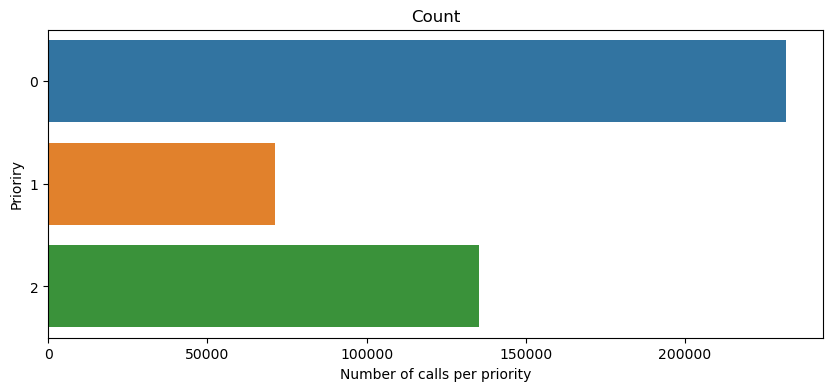

In [132]:
fig = plt.figure(figsize=(10, 4))

cantidad = df['priority'].value_counts()
sns.barplot(x=cantidad.values, y=cantidad.index)
plt.xlabel('Number of calls per priority') ; plt.ylabel('Prioriry') ; plt.title('Count')
plt.show()

In [133]:
(df['priority'].value_counts() / len(df)) * 100

0    52.872331
2    30.873595
1    16.254074
Name: priority, dtype: float64

Se pueden ver las tres categorías de prioridad ya informadas, donde cerca del 82% pertenece a la categoría 0 y 1 que se refieren a los clientes no identificados o regulares, siendo el 31% clientes de prioridad.

<a name='3.2.5'></a>
### 3.2.5 type


In [134]:
df['type'].value_counts()

PS     299679
NW      67495
NE      38030
IN      19220
TT      12183
PE       1789
 TT         6
AA          5
Name: type, dtype: int64

In [135]:
# Se observa que 'TT' tiene espacios extras, por lo que se limpia esa columna.
df['type'] = df['type'].str.strip()
df['type'].value_counts()

PS    299679
NW     67495
NE     38030
IN     19220
TT     12189
PE      1789
AA         5
Name: type, dtype: int64

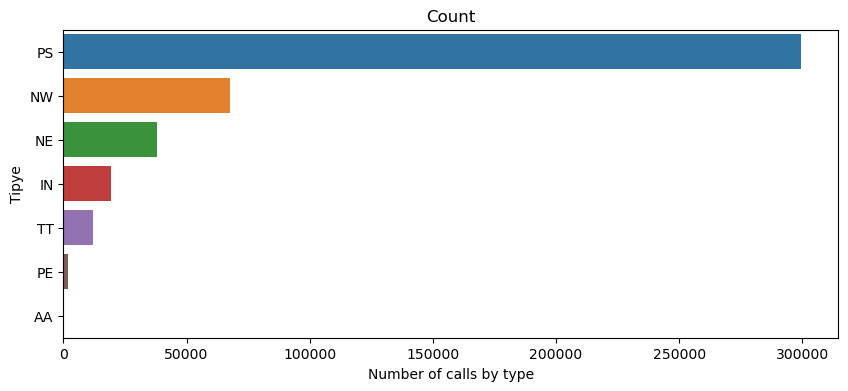

In [136]:
cantidad = df['type'].value_counts()

fig = plt.figure(figsize=(10, 4))
sns.barplot(x=cantidad.values, y=cantidad.index)
plt.xlabel('Number of calls by type') ; plt.ylabel('Tipye') ; plt.title('Count')
plt.show()

In [137]:
round(((df['type'].value_counts() / len(df)) * 100),2)

PS    68.36
NW    15.40
NE     8.67
IN     4.38
TT     2.78
PE     0.41
AA     0.00
Name: type, dtype: float64

Se verifican los 6 tipos de servicios que se informaron, pero se encontró una categoría AA que no tiene descripción y que corresponde al 0.001% de las llamadas. Se considera un error de tipeo y se elimina del conjunto.

Por otra parte, PS que significa Actividad regular, fue el servicio que se prestó en el 68% de los llamados.

In [138]:
df = df[df['type'] != 'AA']
(df['type'] == 'AA').sum()

0

<a name='3.2.6'></a>
### 3.2.6 outcome


In [139]:
df['outcome'].value_counts()

AGENT      347323
HANG        87495
PHANTOM      3584
Name: outcome, dtype: int64

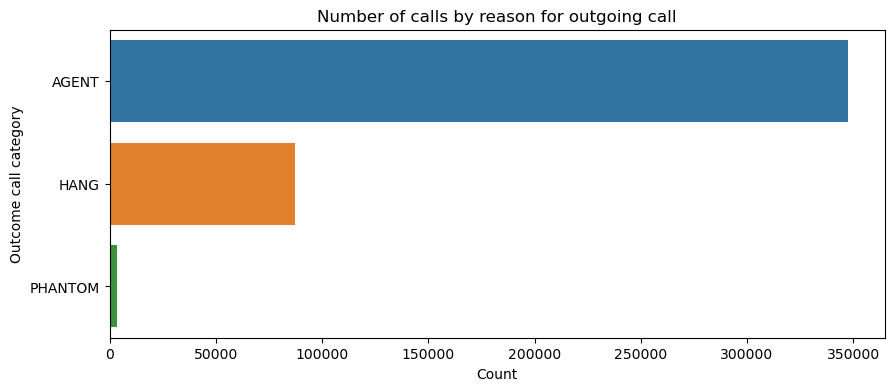

In [140]:
cantidad = df['outcome'].value_counts()

fig = plt.figure(figsize=(10, 4))
sns.barplot(x=cantidad.values, y=cantidad.index)
plt.xlabel('Count') ; plt.ylabel('Outcome call category') ; plt.title('Number of calls by reason for outgoing call')
plt.show()

In [141]:
round(((df['outcome'].value_counts() / len(df)) * 100),2)

AGENT      79.22
HANG       19.96
PHANTOM     0.82
Name: outcome, dtype: float64

Se observan las 3 categorías de posibles salidas de las llamadas tal lo informado. La categoría predominante es AGENT que significa que se dio servicio. Esto ocurre en el 79% de las llamadas. Alrededor del 20% son llamados donde el cliente cortó o no se dio el servicio.

<a name='3.2.7'></a>
### 3.2.7 server


In [142]:
# Se quieren ver todas las categorías
count_server = df['server'].value_counts()
category_server = pd.DataFrame({'Category': count_server.index, 'Count': count_server.values})
category_server

,Category,Count
0,NO_SERVER,96269
1,SHARON,27350
2,STEREN,20338
3,AVNI,19787
4,MORIAH,19420
5,AVI,19366
6,KAZAV,18527
7,YITZ,16962
8,TOVA,16957
9,BASCH,15456


In [143]:
top5 = df['server'].value_counts()[:5]
top5

NO_SERVER    96269
SHARON       27350
STEREN       20338
AVNI         19787
MORIAH       19420
Name: server, dtype: int64

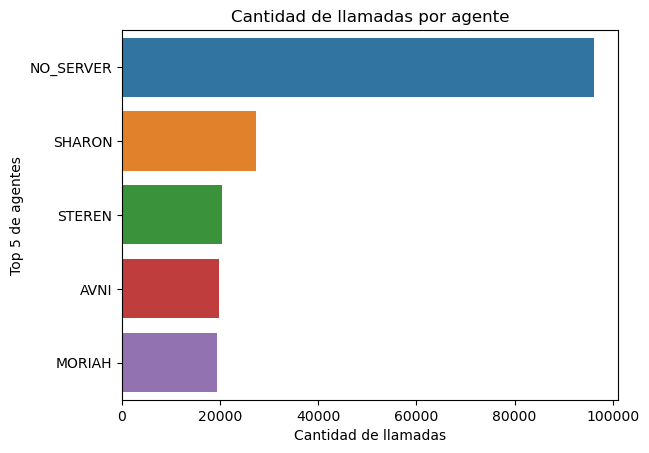

In [144]:
sns.barplot(x=top5.values, y=top5.index.tolist())
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Top 5 de agentes')
plt.title('Cantidad de llamadas por agente')
plt.show()

In [145]:
round(((df['server'].value_counts() / len(df)) * 100),2)[:5]

NO_SERVER    21.96
SHARON        6.24
STEREN        4.64
AVNI          4.51
MORIAH        4.43
Name: server, dtype: float64

Hay 53 categorías de agentes que atienden los llamadas. Según se informa, la categoría NO_SERVER significa que a esa llamada no se le dio servicio. Esta categoría se encuentra en casi 22% de las llamadas.

Sin embargo, se tienen dudas de la calidad de esta columna, dado que se encontraron otras categorías que podrían significar lo mismo que NO_:_SERVER, como ANO_SERVERT y NO_SERVERAMA.

Por otra parte, se observa que el agente que mas llamados atiende es SHARON con el 6% de las llamadas, pero dada la calidad de la columna, donde se encontraron nombres que comienzan con Z1 y Z2, sin ninguna información al respecto, no se puede avanzar con el análisis certero de esta columna.

Si bien es una columna muy importante, hasta tanto tener mas información al respecto para la limpieza. Se elimina del conjunto.

In [146]:
# Eliminación de server
df = df.drop('server', axis=1)

<a name='4'></a>
# 4. Descarga del DataFrame limpio

Finalmente, se guarda el dataframe limpio para continuar con las preguntas planteas para el negocio.

In [147]:
df.to_csv('Call_center_limpio.csv', index=False)
print("DataFrame limpio guardado en 'Call_center_limpio.csv'")

DataFrame limpio guardado en 'Call_center_limpio.csv'
